In [1]:
from IPython.display import clear_output
import json
import matplotlib.pyplot as plt
from PIL import Image
import random
from tqdm import tqdm

from Config import *
working_dir = get_working_dir()

In [2]:
# Why do we want to label the test images?
# -  We need to split the test images into the 'splits' for evaluation and we don't want to use a (noisy) algorithm to do so
# -  By training the 'patch finder' on the test images, we help ensure that it doesn't overfit to the training images, where it is actually used

with open('{}/dataset.json'.format(working_dir), 'r') as f:
    dataset = json.load(f)

dataset = dataset['test']

In [3]:
# Label the images based on whether or not they have a patch:
# No Patch - just hit return (ie, enter an empty string)
# Patch - enter any other string

if False:
    patches = {}
    for i in tqdm(dataset):
        info = dataset[i]
        im = Image.open(info[0])
        plt.imshow(im)
        plt.show()
        inp = input()

        if inp == '':
            patches[i] = 0
        else:
            patches[i] = 1

        clear_output(wait = True)
        
    with open('{}/patches.json'.format(working_dir), 'w') as f:
        json.dump(patches, f)

In [4]:
with open('{}/patches.json'.format(working_dir), 'r') as f:
    patches = json.load(f)

In [5]:
splits = {'both': [], 'just_main': [], 'just_spurious': [], 'neither': []}

for i in dataset:
    label = dataset[i][1]
    patch = patches[i]
    
    if label == 1:
        if patch == 1:
            splits['both'].append(i)
        else:
            splits['just_main'].append(i)
    else:
        if patch == 1:
            splits['just_spurious'].append(i)
        else:
            splits['neither'].append(i)
            
with open('{}/splits.json'.format(working_dir), 'w') as f:
    json.dump(splits, f)
            


both 0
just_main 104
just_spurious 899
neither 697


both 0



just_main 104


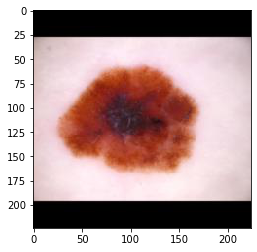

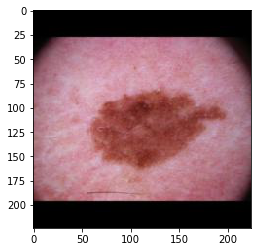

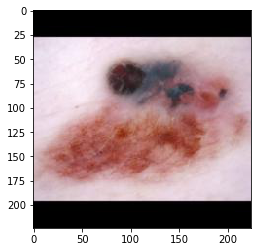

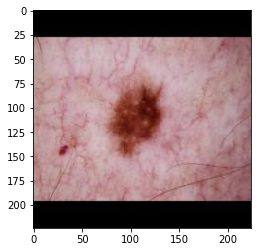

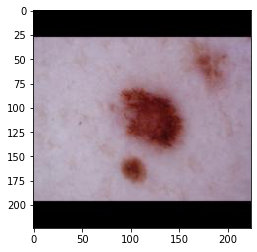

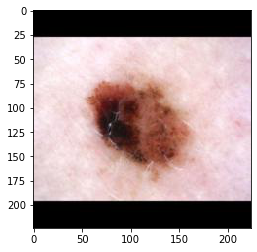

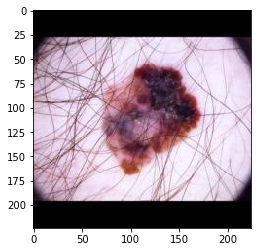

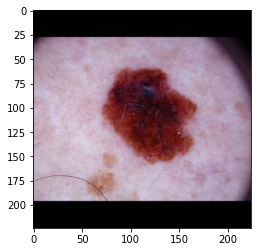

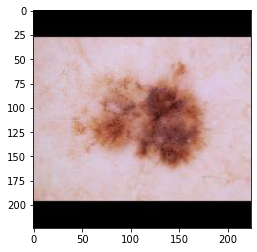

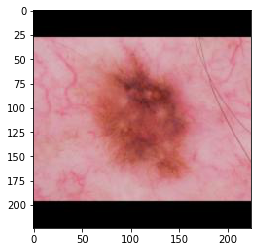

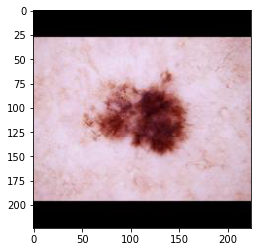

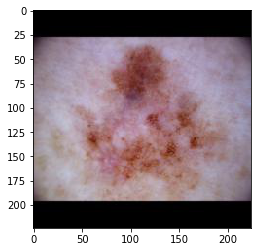

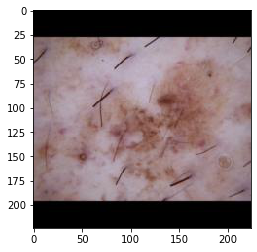

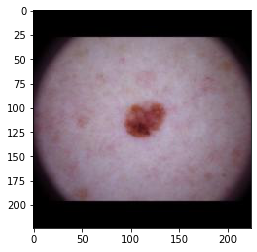

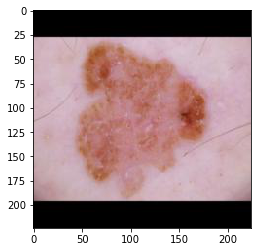

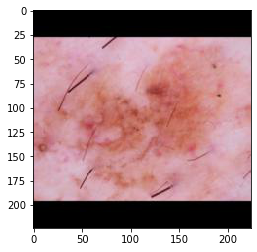

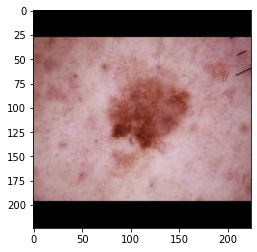

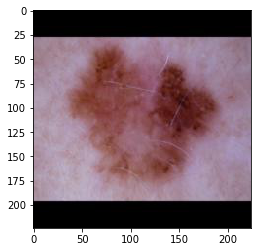

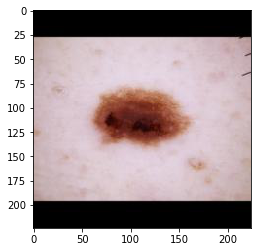

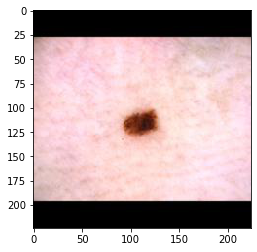




just_spurious 899


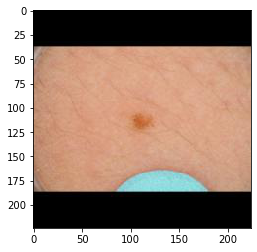

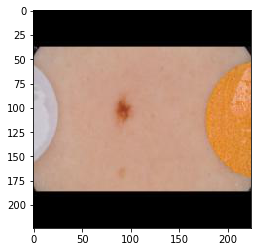

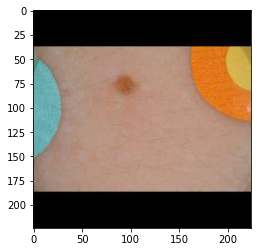

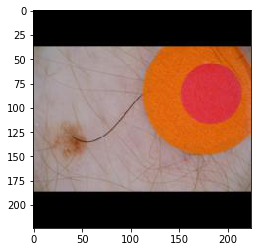

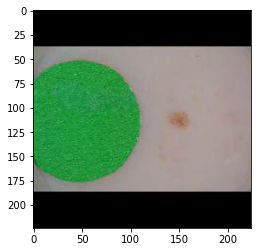

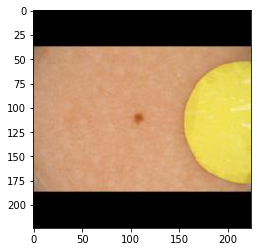

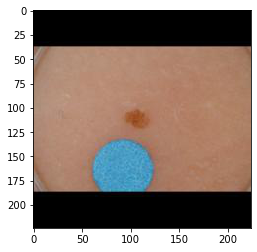

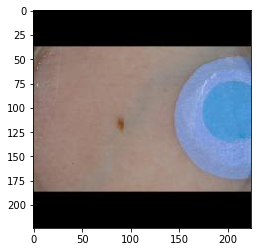

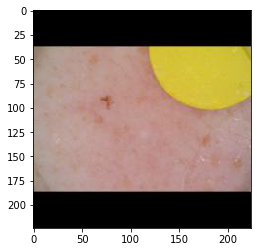

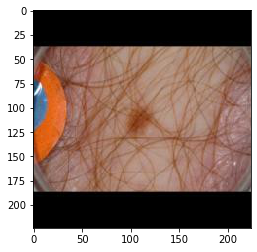

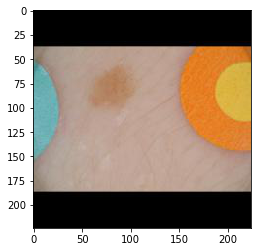

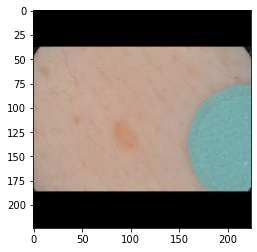

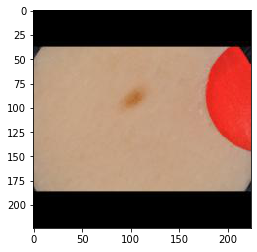

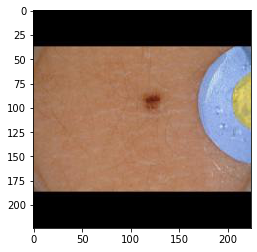

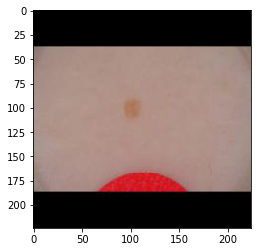

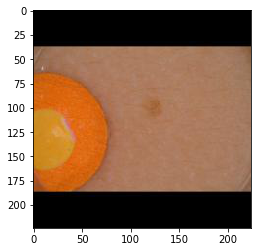

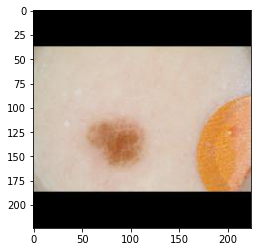

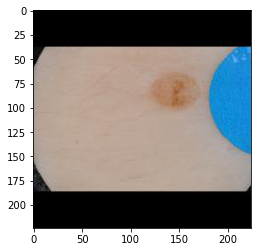

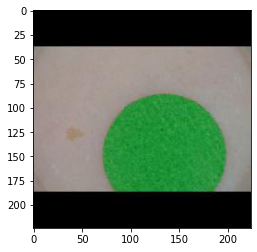

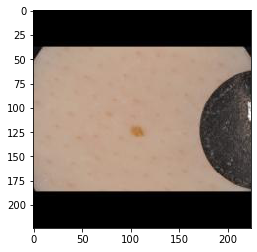




neither 697


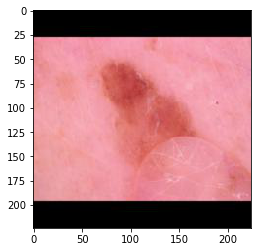

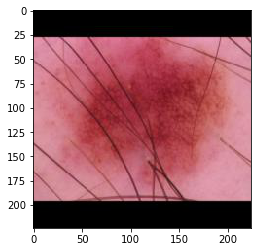

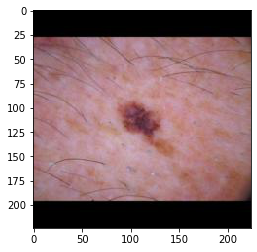

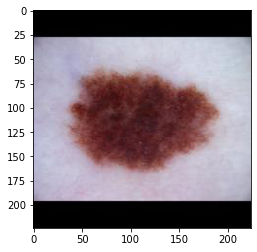

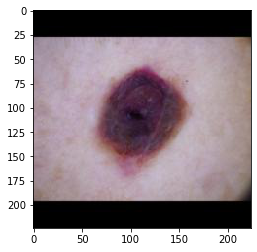

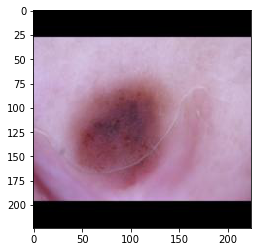

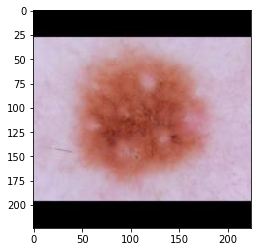

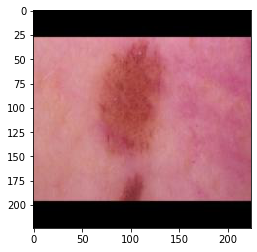

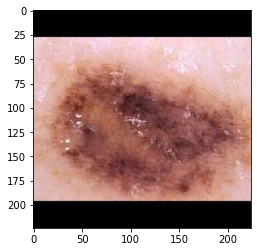

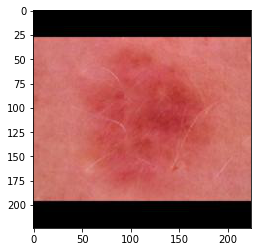

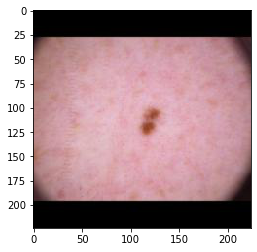

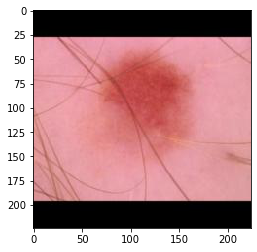

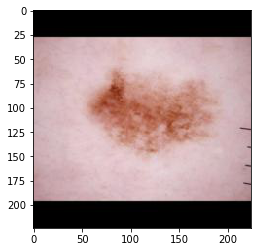

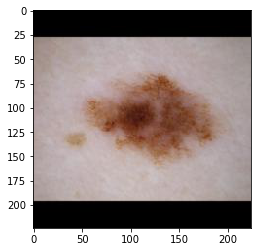

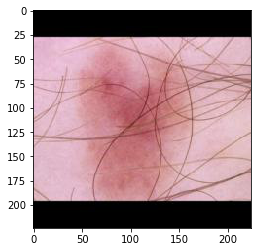

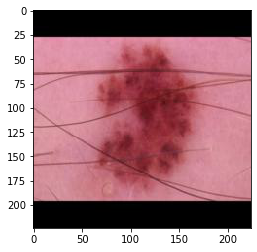

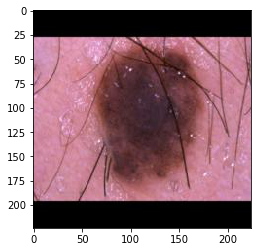

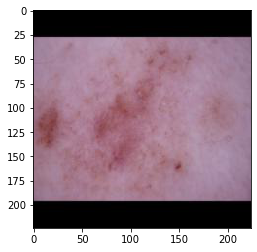

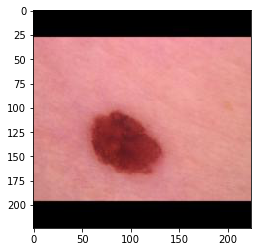

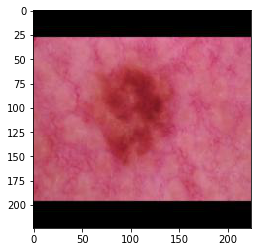

In [6]:

for split in splits:
    
    n = len(splits[split])
    num_samples = min(n, 20)
    samples = random.sample(splits[split], num_samples)
    
    print(split, n)
    for i in samples:
        info = dataset[i]
        im = Image.open(info[0])
        plt.imshow(im)
        plt.show()
        plt.close()
        
    print()
    print()
    print()